# Web Scrapping Wikipedia

Para la creación de la tabla de los territorios, se extraera todos los codigos postales de Costa Rica. https://es.wikipedia.org/wiki/Anexo:C%C3%B3digos_postales_de_Costa_Rica. Para que de esta manera poder crear la tabla de MySQL, llamada Territorio, y tener toda la información correcta acerca esta.

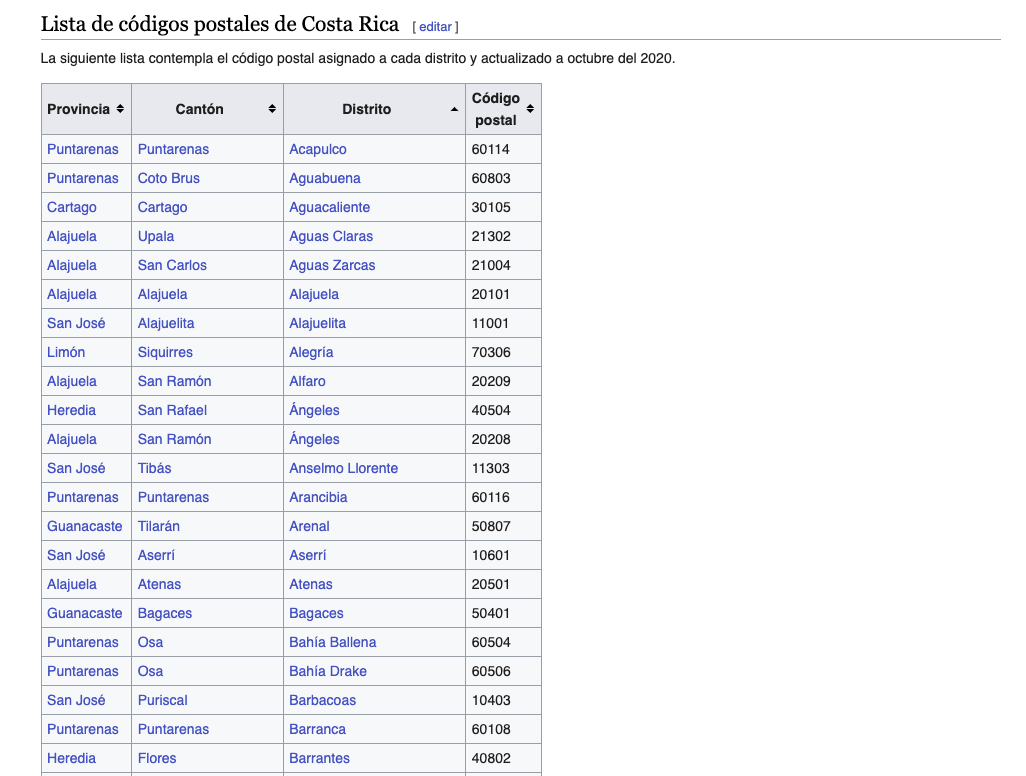

## Importamos la librerias

* **requests**: libreria que poder obtener el contenido HTML
* **BeautifulSoup**: libreria que permite hacer el web-scrapping para poder agarrar la tabla de codigos postales de CR
* **pandas**: libreria la cual vamos a utilizar para poder crear un DataFrame

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

## Obtención de la información

### Utilizamos requests 
Esto para poder acceder al contenido de la pagina https://es.wikipedia.org/wiki/Anexo:C%C3%B3digos_postales_de_Costa_Rica y verificar que si tenemos permisos para poder hacer web-scrapping

In [2]:
res = requests.get("https://es.wikipedia.org/wiki/Anexo:C%C3%B3digos_postales_de_Costa_Rica")

if res.status_code == 200: #Si HTTP == 200, significa que la solicitud se realizó correctamente
    soup = BeautifulSoup(res.text, "html.parser")
    tabla = soup.find("table", {"class": "wikitable"}) #Buscamos la tabla que se encuentra en el link

In [3]:
filas = tabla.find_all("tr") #Buscamos todas las filas que definen a la tabla 

data = []

for fila in filas[1:]:
    celda = fila.find_all(["td", "th"]) #Encabezados y Datos
    if len(celda) == 4: #Si es 4 quiere decir que hay un cambio de provincia
        provincia_actual = celda[0].get_text(strip=True)
        canton = celda[1].get_text(strip=True)
        distrito = celda[2].get_text(strip=True)
        codigo_postal = celda[3].get_text(strip=True)
        data.append([provincia_actual, canton, distrito, codigo_postal])
    elif len(celda) == 3: #Si es 3 quiere decir que no hay cambio de provincia
        canton = celda[0].get_text(strip=True)
        distrito = celda[1].get_text(strip=True)
        codigo_postal = celda[2].get_text(strip=True)
        data.append([provincia_actual, canton, distrito, codigo_postal])
    else:
        pass

In [4]:
df = pd.DataFrame(data, columns=["Provincia", "Cantón", "Distrito", "Código Postal"])
df

,Provincia,Cantón,Distrito,Código Postal
0,San José,San José,Carmen,10101
1,San José,Escazú,Escazú,10201
2,San José,Desamparados,Desamparados,10301
3,San José,Puriscal,Santiago,10401
4,San José,Tarrazú,San Marcos,10501
...,...,...,...,...
77,Limón,Pococí,Guápiles,70201
78,Limón,Siquirres,Siquirres,70301
79,Limón,Talamanca,Bratsi,70401
80,Limón,Matina,Matina,70501


In [5]:
for i in range(df.shape[0]):
    print(f"({df.iloc[i][0]},{df.iloc[i][1]},{df.iloc[i][2]},{df.iloc[i][3]}),")

(San José,San José,Carmen,10101),
(San José,Escazú,Escazú,10201),
(San José,Desamparados,Desamparados,10301),
(San José,Puriscal,Santiago,10401),
(San José,Tarrazú,San Marcos,10501),
(San José,Aserrí,Aserrí,10601),
(San José,Mora,Colón,10701),
(San José,Goicoechea,Guadalupe,10801),
(San José,Santa Ana,Santa Ana,10901),
(San José,Alajuelita,Alajuelita,11001),
(San José,Vázquez de Coronado,San Isidro,11101),
(San José,Acosta,San Ignacio,11201),
(San José,Tibás,San Juan,11301),
(San José,Moravia,San Vicente,11401),
(San José,Montes de Oca,San Pedro,11501),
(San José,Turrubares,San Pablo,11601),
(San José,Dota,Santa María,11701),
(San José,Curridabat,Curridabat,11801),
(San José,Pérez Zeledón,San Isidro de El General,11901),
(San José,León Cortés Castro,San Pablo,12001),
(Alajuela,Alajuela,Alajuela,20101),
(Alajuela,San Ramón,San Ramón,20201),
(Alajuela,Grecia,Grecia,20301),
(Alajuela,San Mateo,San Mateo,20401),
(Alajuela,Atenas,Atenas,20501),
(Alajuela,Naranjo,Naranjo,20601),
(Alajuela,Pa